#- 좌측에 목차를 최대한 열심히 정리해 놓았습니다. 
#- 목차를 참고하시면 조금 더 수월하게 보실 수 있으실 것 같습니다.

#**[데이터 선정 이유]**

- 데이터 출처 : Kaggle ["noshowappointments"](https://www.kaggle.com/joniarroba/noshowappointments)
      
        현대사회에서 의료진당 환자의 비율은 매우 높습니다.
        우리나라의 경우 의사 1명당 500명의 환자를 책임지고 있으며, 주요 선진국의 경우도 크게 다르지 않은데요. 
        이때문에 종합병원 이상의 병원에 예약을 하면 적게는 1주일에서 많게는 6개월까지 기다려야 하는 경우가 있습니다.

        '높은 환자당 의료진의 비율'과 더불어 '진료예약을 해놓고 예약일에 내원하지 않는 사람들'의 존재는 
        환자들이 원하는 시기에 적절한 진료를 받을 수 없게끔 합니다.
        
        따라서 저는 이번 데이터를 가지고 성별, 질병여부, 나이등의 여러 변수를 분석하여 
        진료예약날짜에 내원하지 않는, 이른바 예약일에 No-show하는 사람들을 예측해 보려고 합니다.
        이런 예측을 함으로써 병원에서는 예약확인을 반복적으로 하는등의 적절한 조치를 통해서 
        No-show하는 사람들의 비율을 줄일 수 있을 것 입니다.
        
        이로인해 환자들이 원하는 시기에 적절한 진료를 빠르게 받아볼 수 있도록 할 수 있으며, 
        병원에서도 최대수의 환자를 진료할 수 있기 때문에 이익을 극대화 할 수 있을 것이라는 기대감을 가질 수 있습니다.

#**[target 선정 및 문제유형]**
  

- target은 'No-show'로 선택하였습니다.
  
        이번 과제의 목표는 진료예약에 'No-show'하는 사람들에 대한 예측입니다.
        'show' 보다 'No-show'에 포커싱하여 문제해결을 해 나갈 예정입니다.

- 제가 선택한 문제유형은 Binary Classification 문제입니다.



# **1. 데이터 불러오기**
- 데이터 출처 : Kaggle ["noshowappointments"](https://www.kaggle.com/joniarroba/noshowappointments)
- 데이터는 110527개의 sample이 있으며, target(No-show)를 포함해 14개의 feature가 있습니다.

In [ ]:
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*

     |████████████████████████████████| 81kB 4.0MB/s 


In [ ]:
pip install eli5

     |████████████████████████████████| 112kB 5.6MB/s 


In [ ]:
pip install shap

     |████████████████████████████████| 358kB 5.4MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490500 sha256=dae25795700d425a9c72b7c4d83d6d195ee777766c364c46094f852ca2597949
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [ ]:
pip install PDPbox

     |████████████████████████████████| 57.7MB 68kB/s 
  Created wheel for PDPbox: filename=PDPbox-0.2.0-cp37-none-any.whl size=57690722 sha256=f534a27bfce5f67bc950d66439fa0e23fadbd6106131304ac17585aaaf5b5279
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built PDPbox


In [ ]:
# EDA 도구

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# model 관련 라이브러리

from sklearn.pipeline import make_pipeline, Pipeline 
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve

# model 해석

import shap
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp
from pdpbox.pdp import pdp_interact, pdp_interact_plot


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 

# 데이터 불러오기

from google.colab import files
uploaded = files.upload()

Saving KaggleV2-May-2016.csv to KaggleV2-May-2016.csv


##**(1) 데이터 확인**

In [ ]:
df = pd.read_csv('KaggleV2-May-2016.csv')

print('='*27)
print('데이터의 Shape :', df.shape)
print('='*27)
df.head()

데이터의 Shape : (110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#**2. EDA(Exploratory Data Analysis)**

##**(1) 중복된 feature가 있는지 확인**
- 중복된 feature는 없습니다

In [ ]:
df.T.duplicated()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

## **(2) Target feature의 분포 확인**

- 
       진료예약일에 약속대로 내원한 사람(0)이 그렇지 않은 사람(1)보다 많습니다. 즉, target 값이 imbalance 합니다.
       imbalanced data이기 때문에 추후 모델평가시 accuracy만 사용하기 보다는 
       f1-score, precision, recall, AUC-score등을 평가지표로 사용하여야 합니다.

In [ ]:
print('=' * 60)
print('< 진료 예약일에 내원한(No) 사람의 수 vs 내원하지 않은(Yes) 사람의 수 >')
print('')
print(df['No-show'].value_counts())
print('=' * 60)
print('< 진료 예약일에 내원한(No) 사람의 비율 vs 내원하지 않은(Yes) 사람의 비율 >')
print('')
print(df['No-show'].value_counts(normalize = True))
print('=' * 60)

< 진료 예약일에 내원한(No) 사람의 수 vs 내원하지 않은(Yes) 사람의 수 >

No     88208
Yes    22319
Name: No-show, dtype: int64
< 진료 예약일에 내원한(No) 사람의 비율 vs 내원하지 않은(Yes) 사람의 비율 >

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64


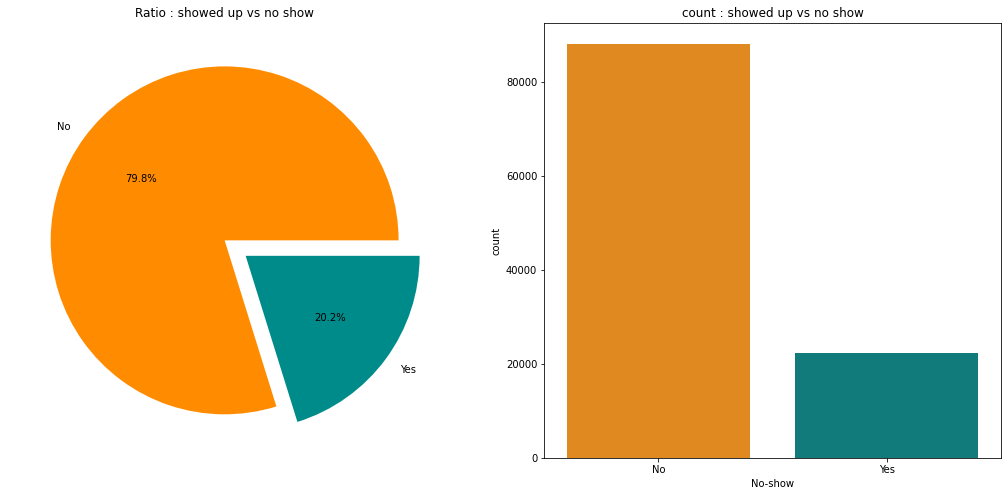

In [ ]:
# 진료예약일에 약속대로 온 사람과 안온 사람의 비율과 숫자 시각화

f, ax = plt.subplots(1, 2, figsize = (18,8))
df['No-show'].value_counts().plot.pie(explode = [0, 0.15], autopct = '%1.1f%%', ax = ax[0], colors = ['#ff8c00', '#008b8b'] )
ax[0].set_title('Ratio : showed up vs no show')
ax[0].set_ylabel('')
sns.countplot('No-show', data = df, palette = ['#ff8c00', '#008b8b'], ax = ax[1])
ax[1].set_title('count : showed up vs no show');

##**(3) Baseline 설정 및 평가지표 설정**

[Baseline 설정]
- Imbalanced data이기 때문에 Baseline은 빈도수가 높은 target값(NO)의 비율로 설정했습니다.
- 이유는 추후 모델 평가시에 수치가 높게 나왔을 경우, Baseline 수치와 비교하여 정말로 예측을 잘하는 모델인지 평가를 하기 위함입니다.   
- 또한 모델이 목표로 해야할 수치를 Baseline을 기준으로 잡기위함입니다.

[평가지표]

- target값이 Yes : No = 2 : 8 정도인 Imbalanced data이기 때문에
- accuracy와 함께 precision, recall, f1-score, AUC 등을 이용해야 합니다.

In [ ]:
# 기준모델과설정 및 기준모델의 accuracy출력

# mode(): Return the highest frequency value in a Series.
major = df['No-show'].mode()[0]               # 기준모델
y_pred_b = [major] * len(df['No-show'])       # 기준모델로 예측

# 기준모델로 accuracy 계산
print("기준모델의 accuracy: ", accuracy_score(df['No-show'], y_pred_b))

기준모델의 accuracy:  0.798067440534892


##**(4) Target 외의 feature**

**feature type 확인**
      
            Gender             Categorical Feature
            ScheduledDay       Continous Feature
            AppointmentDay     Categorical Feature
            Age                Continous Feature
            Neighbourhood      Categorical Feature
            Scholarship        Categorical Feature
            Hipertension       Categorical Feature
            Diabetes           Categorical Feature
            Alcoholism         Categorical Feature
            Handcap            Categorical Feature
            SMS_received       Categorical Feature

In [ ]:
# feature types

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [ ]:
df.dtypes.value_counts()

int64      8
object     5
float64    1
dtype: int64

In [ ]:
# Number of unique classes in each object column
# PatientId가 중복인 것을 보니 전체 sample의 60프로가 조금 안되는 인원이 중복이다. 

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [ ]:
# Number of unique classes in each object column

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**이상치(Anomalies) 확인**

- 'Age' column에 -1 과 115라는 이상치가 존재합니다. 
        '115' : 115세의 나이가 있을 수 있으므로 그대로 둡니다.
        (Gerontology Research Group(GRG)에 게시되어 있는 기록상 122세가 가장 나이 많았던 사람이였습니다)
        
        '-1' : -1 이라는 나이는 태아를 뜻합니다. 관련 샘플의 수가 많다면 고려해볼만 하지만, 
              갯수가 1개이고 target과 큰 관계가 없어보이므로 삭제합니다.

In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


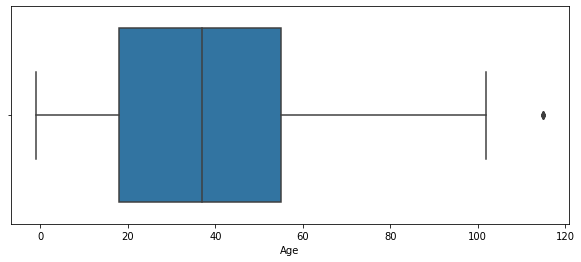

In [ ]:
# 'Age' column에 대한 boxplot

f, ax  = plt.subplots(figsize = (10,4))
sns.boxplot(x="Age", data=df);

In [ ]:
# 태아를 뜻하는 -1 은 sample수가 1개입니다.

df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [ ]:
# 이상치('-1') 제거

index_태아 = df[df['Age'] == -1].index
df = df.drop(index_태아)

In [ ]:
# categorical data를 숫자로 변환

df['Gender'].replace(['M','F'], [1,0], inplace = True)
df['No-show'].replace(['No','Yes'], [0,1], inplace = True)

###**(4)-1. AppointmentDay    :   Continous Feature**

- AppointmentDay가 매우 좁은 기간에 한정되어 있습니다. 
- 따라서 제가 찾은 데이터가 큰 데이터 중 일부 데이터일 가능성이 있을 수 있습니다.

In [ ]:
df.groupby(['AppointmentDay', 'No-show'])['No-show'].count()

AppointmentDay        No-show
2016-04-29T00:00:00Z  0          2602
                      1           633
2016-05-02T00:00:00Z  0          3515
                      1           861
2016-05-03T00:00:00Z  0          3425
                      1           831
2016-05-04T00:00:00Z  0          3195
                      1           973
2016-05-05T00:00:00Z  0          3466
                      1           807
2016-05-06T00:00:00Z  0          3084
                      1           795
2016-05-09T00:00:00Z  0          3501
                      1          1019
2016-05-10T00:00:00Z  0          3316
                      1           992
2016-05-11T00:00:00Z  0          3589
                      1           885
2016-05-12T00:00:00Z  0          3557
                      1           837
2016-05-13T00:00:00Z  0          3082
                      1           905
2016-05-14T00:00:00Z  0            30
                      1             9
2016-05-16T00:00:00Z  0          3564
                    

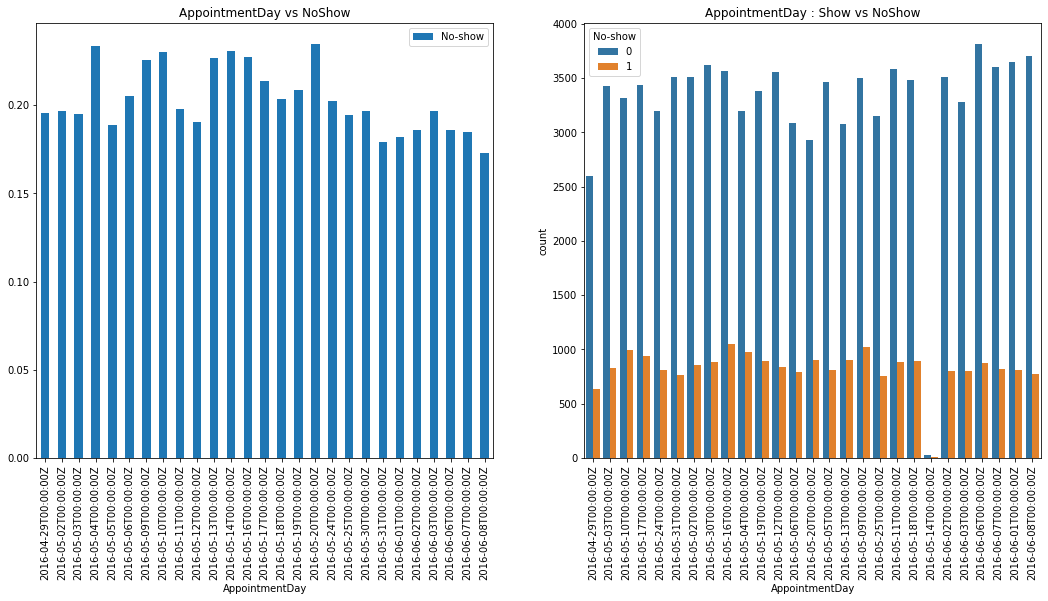

In [ ]:
f,ax = plt.subplots(1, 2, figsize = (18, 8))
df[['AppointmentDay', 'No-show']].groupby(['AppointmentDay']).mean().plot.bar(ax = ax[0])
ax[0].set_title('AppointmentDay vs NoShow')
sns.countplot('AppointmentDay',hue='No-show',data = df, ax=ax[1])
ax[1].set_title('AppointmentDay : Show vs NoShow')
plt.xticks(rotation=90);

###**(4)-2. Gender    :   Categorical Feature**

- 
        약 58,000명의 여성과 30,000명의 남성이 예약일에 Show-up 했으며
        약 14,000명의 여성과  8,000명의 남성이 예약이에 No-show 했습니다.
        
        비율적으로 보면 남성에 비해 여성이 근소하게 No-show 비율이 높습니다.


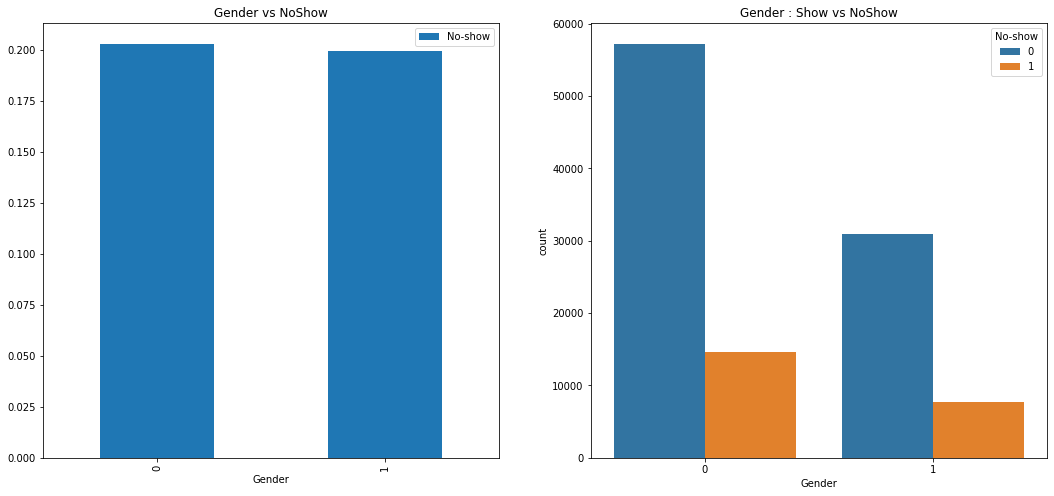

In [ ]:
f,ax = plt.subplots(1, 2, figsize = (18, 8))
df[['Gender', 'No-show']].groupby(['Gender']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Gender vs NoShow')
sns.countplot('Gender',hue='No-show',data = df, ax=ax[1])
ax[1].set_title('Gender : Show vs NoShow');

###**(4)-3. Neighbourhood    :   Categorical Feature**

- 첫번째 그래프 : 지역별 병원 예약 환자수

       Jardim Camburi 지역에서 가장 많은 예약을 했습니다.
       전체 지역중 예약이 많은 상위 1/3 지역의 예약환자수가 총 예약환자수의 90%가량을 차지합니다.
- 두번째, 세번째 그래프 : 지역별 show-up, No-show 발생건수

       Jardim Camburi 지역에서 그만큼 많은 No-show 발생건수가 있었지만 비율적을 볼때 낮은 수준의 No-show입니다.
       모든 지역에서 No-show 비율은 비슷하게 나타납니다.
       cf)비율이 1 또는 0이 나온 지역은 sample수가 3개미만으로 있어서 신뢰하기 어렵습니다.

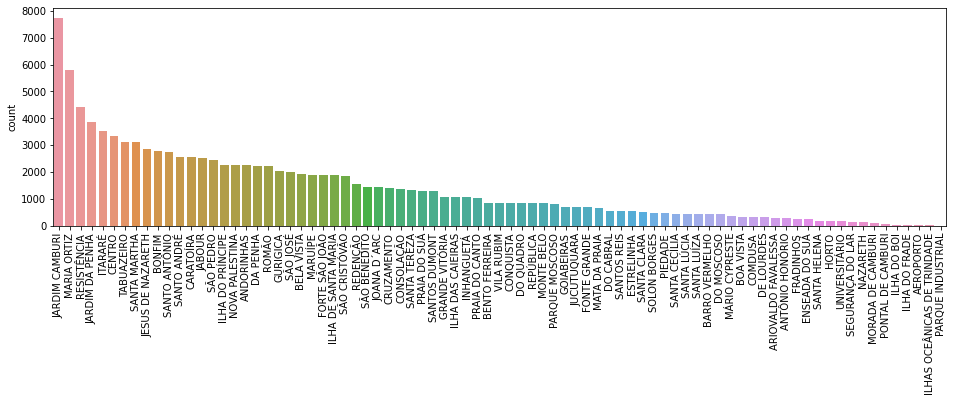

In [ ]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.countplot(np.sort(df.Neighbourhood), order = df['Neighbourhood'].value_counts().index);

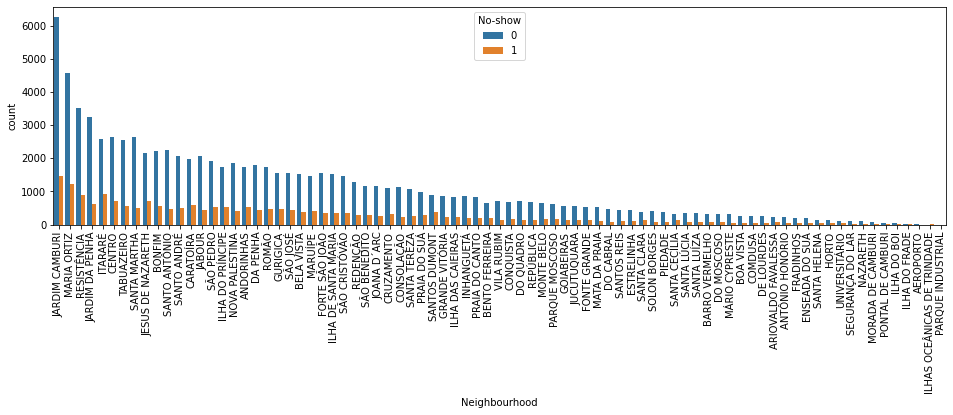

In [ ]:
# Neighbourhood
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.countplot('Neighbourhood', hue = 'No-show', data = df, order = df['Neighbourhood'].value_counts().index);

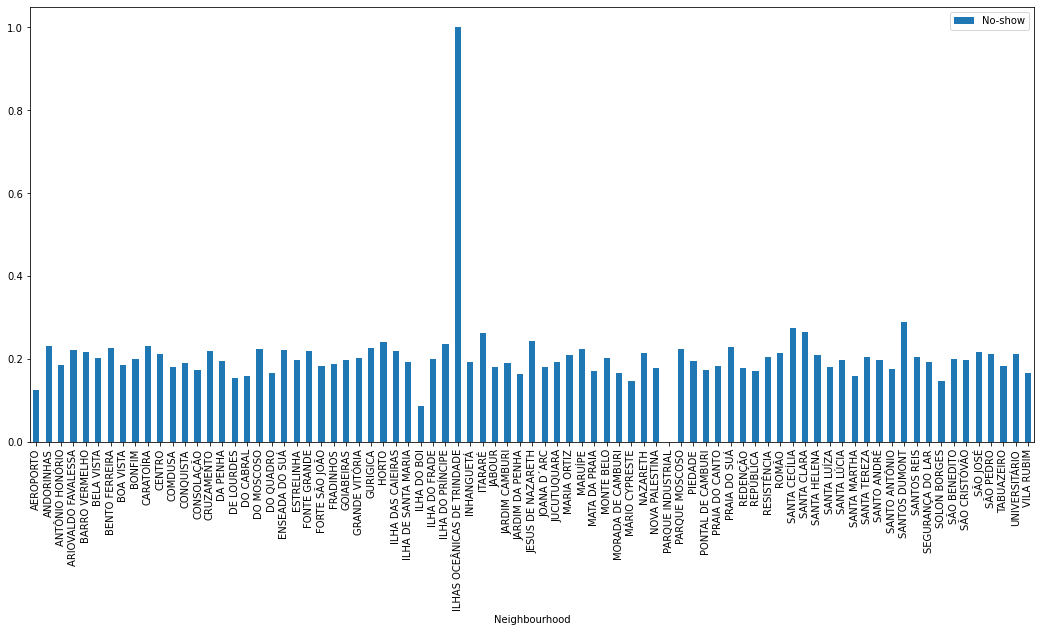

In [ ]:
df[['Neighbourhood', 'No-show']].groupby(['Neighbourhood']).mean().plot.bar(figsize=(18,8));

###**(4)-4. Scholarship     :   Categorical Feature**
- 
        Scholarship을 받는 경우에 상대적으로 No-show 비율이 높습니다.
        "Scholarship을 받으면 여유자금이 생기기 때문에 상대적으로 건강관리에 투자할 여력이 더 많을 것이다."라는 일반적 가설에 반하는 결과입니다.
        어떻게 보면 "Scholarship(지원)을 받는 사람은 에초에 주머니 사정이 좋지 않은 사람이므로 병원비를 감당할 수 없는 실정이다" 
        라는 생각을 해볼 수도 있겠습니다.
        상황이 어쨋건 이렇게 비율이 차이나는 것 자체만으로 No-show와 Show-up을 예측하는데 도움이 될 수 있는 feature일 것이라 생각됩니다. 

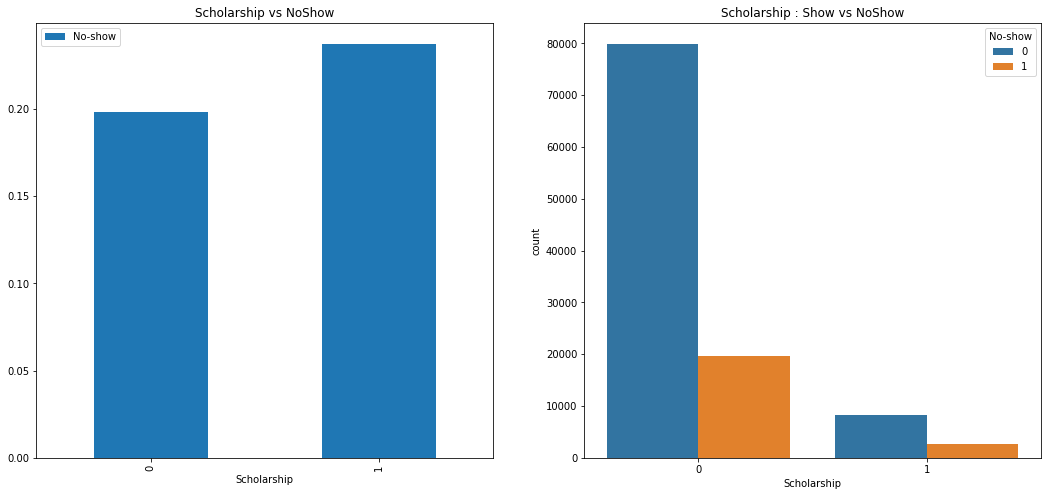

In [ ]:
f,ax = plt.subplots(1, 2, figsize = (18, 8))
df[['Scholarship', 'No-show']].groupby(['Scholarship']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Scholarship vs NoShow')
sns.countplot('Scholarship',hue='No-show',data = df, ax=ax[1])
ax[1].set_title('Scholarship : Show vs NoShow');

###**(4)-5. Hipertension     :   Categorical Feature**
- 
        Hipertension환자는 상대적으로 No-show할 확률이 적습니다.
        이는 "질병이 있으면 진료에 성실하게 임할 것이다" 라는 일반적인 가설에 맞는 결과입니다.
        더불어 이렇게 비율상 차이가 나는 결과는 Scholarship사례와 마찬가지로  
        No-show와 Show-up을 예측하는데 도움이 될 수 있는 feature일 것이라 생각됩니다. 

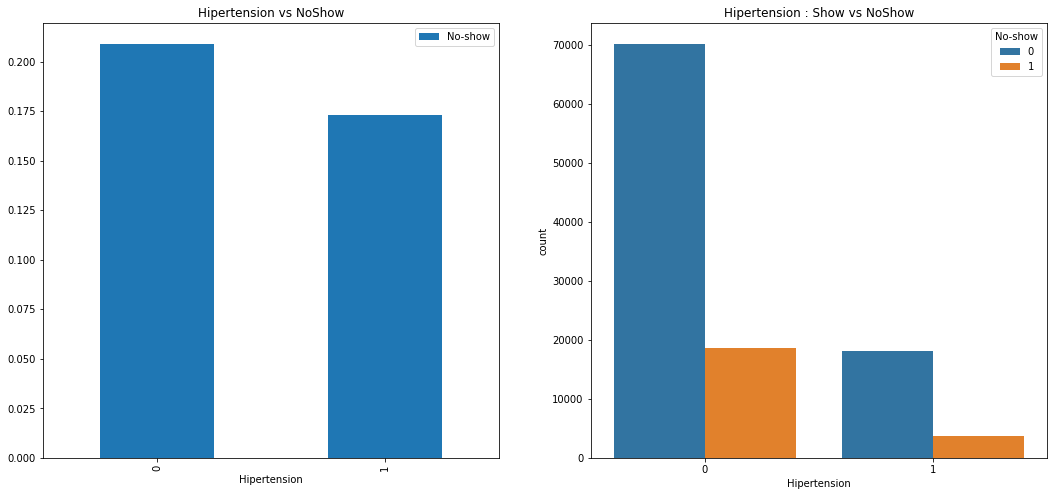

In [ ]:
f,ax = plt.subplots(1, 2, figsize = (18, 8))
df[['Hipertension', 'No-show']].groupby(['Hipertension']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Hipertension vs NoShow')
sns.countplot('Hipertension',hue='No-show',data = df, ax=ax[1])
ax[1].set_title('Hipertension : Show vs NoShow');

###**(4)-6. Diabetes     :   Categorical Feature**

- 
        Diabetes환자는 상대적으로 No-show할 확률이 적습니다.
        이는 "질병이 있으면 진료에 성실하게 임할 것이다" 라는 일반적인 가설에 맞는 결과입니다.
        더불어 이렇게 비율상 차이가 나는 결과는 Scholarship사례와 마찬가지로  
        No-show와 Show-up을 예측하는데 도움이 될 수 있는 feature일 것이라 생각됩니다. 

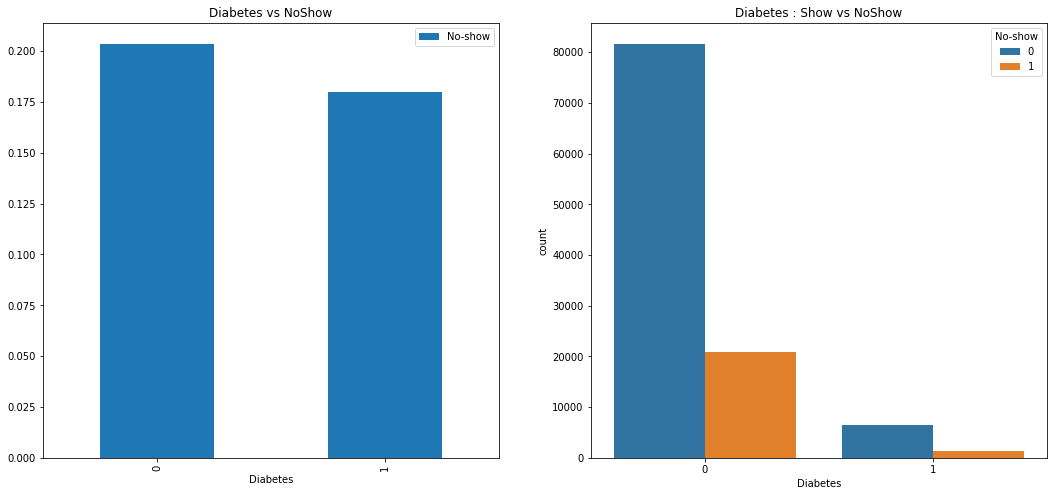

In [ ]:
f,ax = plt.subplots(1, 2, figsize = (18, 8))
df[['Diabetes', 'No-show']].groupby(['Diabetes']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Diabetes vs NoShow')
sns.countplot('Diabetes',hue='No-show',data = df, ax=ax[1])
ax[1].set_title('Diabetes : Show vs NoShow');

###**(4)-7. Alcoholism     :   Categorical Feature**

- 
        Alcoholism환자와  Alcoholism이 아닌 환자사이에는 No-show비율면에서 차이가 나지 않습니다. 
        또한 다른 질병관련 일반인의 No-show비율과 비교해도 큰 차이가 낭지 않습니다.
        "Alcoholism환자도 나름 건강관리를 잘 한다. 술먹는것만 뺴고!"

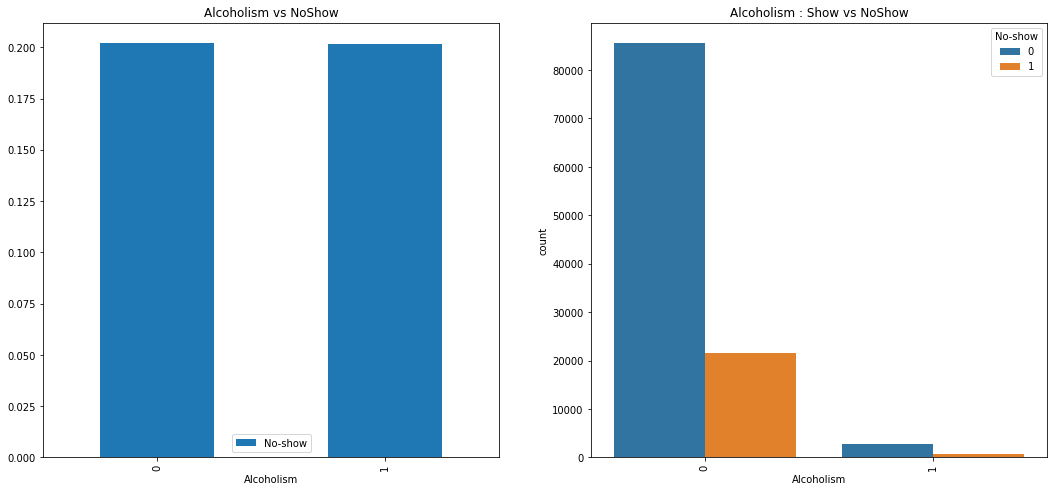

In [ ]:
f,ax = plt.subplots(1, 2, figsize = (18, 8))
df[['Alcoholism', 'No-show']].groupby(['Alcoholism']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Alcoholism vs NoShow')
sns.countplot('Alcoholism',hue='No-show',data = df, ax=ax[1])
ax[1].set_title('Alcoholism : Show vs NoShow')
plt.xticks(rotation=90);

###**(4)-8. Handcap     :   Categorical Feature**

- 
      Handicap이 없는 경우 한개의 Handicap이 있는 경우보다 No-show비율이 높습니다. 
      이는 고혈압, 당뇨 feature과 마찬가지로 건강이 상대적으로 나쁠수록 No-show비율이 낮아진다고 예측할 수 있습니다.
      
      하지만, Handicap이 2개이상으로 많아질수록 No-show비율이 높아지는데요. 
      이는 아마도 많은 Handicap으로 인한 거동의 불편함이 작용했다고 볼 수도 있고,
      수치적으로 많은 데이터가 없기 떄문에 판단하기 애매한 상황으로 해석해 볼 수도 있습니다.
      '핸디캡 = 3' 의 데이터 : 13개 
      '핸디캡 = 4' 의 데이터 : 3개 

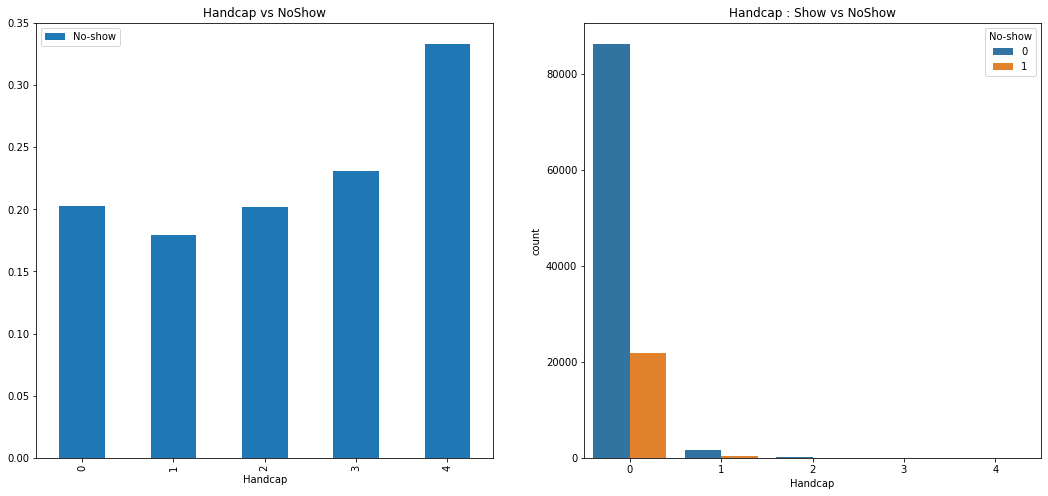

In [ ]:
f,ax = plt.subplots(1, 2, figsize = (18, 8))
df[['Handcap', 'No-show']].groupby(['Handcap']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Handcap vs NoShow')
sns.countplot('Handcap',hue='No-show',data = df, ax=ax[1])
ax[1].set_title('Handcap : Show vs NoShow');

###**(4)-9. SMS_received     :   Categorical Feature**
- 

      진료예약 관련 SMS_received한 그룹이 No-show비율이 높습니다. 
      "SMS_received 하면 한번더 진료에대한 인지를 할 수 있기 때문에 No-show 비율이 줄어들 것이다." 라는 가설에 반하는 결과입니다. 
      누군가 챙겨주면 더 소홀해지는 인간의 특성이 반영된 것이 아닌가 싶을 정도로 No-show비율이 크게 차이가 납니다. 

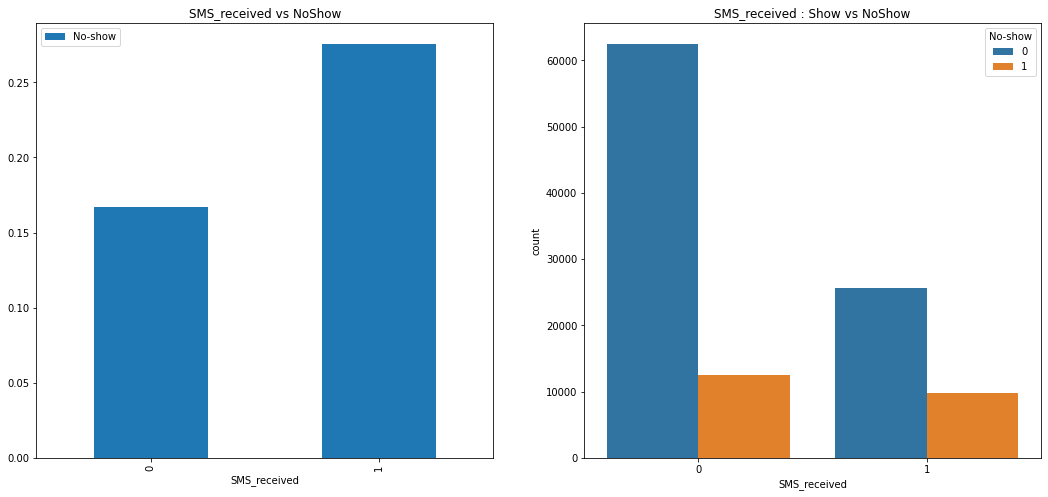

In [ ]:
f,ax = plt.subplots(1, 2, figsize = (18, 8))
df[['SMS_received', 'No-show']].groupby(['SMS_received']).mean().plot.bar(ax = ax[0])
ax[0].set_title('SMS_received vs NoShow')
sns.countplot('SMS_received',hue='No-show',data = df, ax=ax[1])
ax[1].set_title('SMS_received : Show vs NoShow');

###**(4)-10. Age     :   Continous Feature**

- 
       남성, 여성모두 10대 ~ 30대 초반의 연령대에서 No-show비율이 높았습니다.
       아무래도 젊을때는 건강에 대한 염려가 적기때문에 진료참석률이 낮지 않나 생각됩니다.
       분명 개인적 경험에 비추어 볼때도 이 나이대에서 No-show 비율이 높았었던 것 같습니다. 

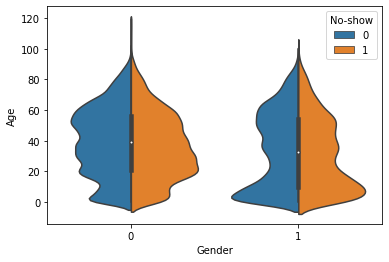

In [ ]:
sns.violinplot('Gender', 'Age', hue = 'No-show',split=True, data = df)

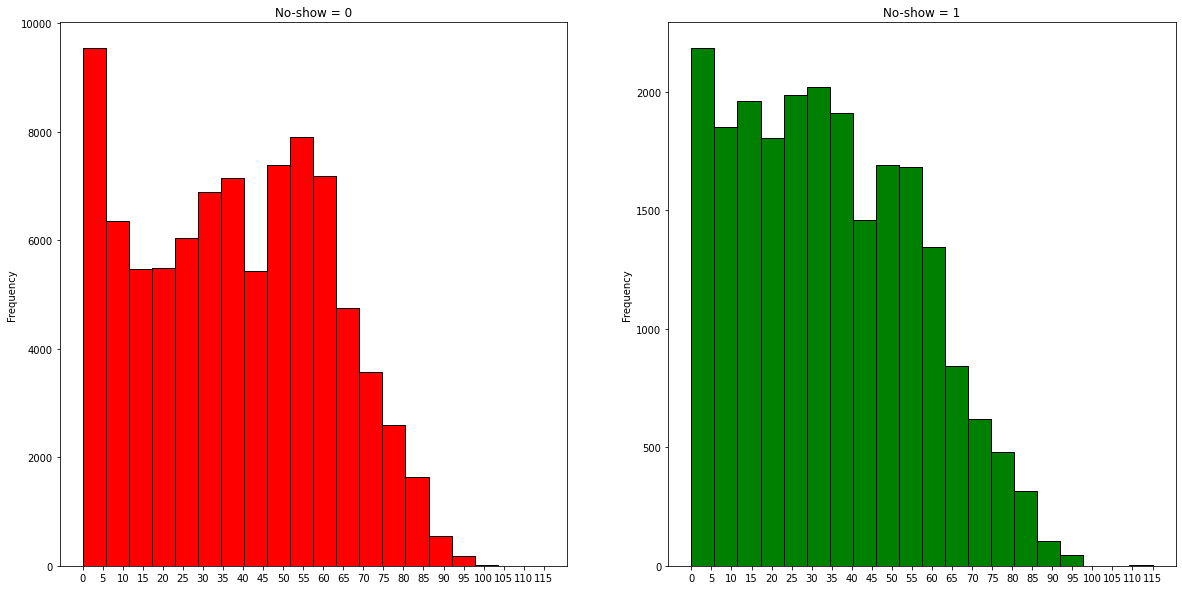

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['No-show']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('No-show = 0')
x1=list(range(0,120,5))
ax[0].set_xticks(x1)
df[df['No-show']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('No-show = 1')
x2=list(range(0,120,5))
ax[1].set_xticks(x2)
plt.show()

# **3. 데이터 전처리 및 Feature engineering**

##**(1) 잘못된 컬럼명 수정**
- Handcap -> Handicap

In [ ]:
# 잘못된 컬럼명 수정

df.rename(columns ={'Handcap' : 'Handicap'}, inplace = True)

##**(2) Feature engineering**

###**(2)-1. 'Sch_int', 'App_int', 'term' feature 생성**

- 'Sch_int', 'App_int'
        'ScheduledDay'와 'AppointmentDay'를 모델학습에 사용하기위해 연,월,시간을 int로 바꿨습니다.  

- 'term' = 'AppointmentDay' - 'ScheduledDay'
        await time. 즉 환자가 예약을 하고 진료일까지의 시간적 간격을 'term'으로 생성했습니다.
        아무래도 term이 길수록 No-show할 확률이 높을 것이다 라는 가설을 기반으로 하였습니다.

- 'term' 시각화 해석
        [barplot]
        국소적으로 term = 1 ~ 10 까지는 No-show의 확률이 오르는 경향성을 보였습니다.
        하지만 전제척으로 봤을 때  뚜렸한 경향성이 그래프상 관찰되지 않았습니다. 

        [stripplot, scatterplot of 'Age', 'term']
        term(진료 예약 후 진료일까지의 시간)은 대체로 0부터 80일 근방까지 수치가 몰려있으며 그 이상의 수치는 130까지 드문드문 퍼져있습니다.
        Age별 term을 보면 10대 20대를 제외한 대부분의 연령대에서 위에서 설명했던 분포를 띄고 있습니다.
        
        [scatterplot of 'Handicap', 'term']
        Handicap별 term을 보면 Handicap 수치가 커질수록 term이 짧아집니다. 자칫 몸이 안좋을수록 빠른 진료를 원하는 구나 라고 생각할 수 있지만, 
        카테고리 0 을 제외한 다른 카테고리에서의 인원수가 적기 떄문에 섣불리 판단할 수 없습니다.

        Handicap     count
            0        108282
            1          2040
            2           183
            3            13
            4             3
        
        [correlation with target]
        target과 관련된 correlation 수치도 0.19 수준으로 높지 않았기 때문에 target과 관련성이 크지 않았습니다.

In [ ]:
# feature engineering : 'Sch_int', 'App_int' feature 생성

df['Sch_int'] = pd.to_datetime(df['ScheduledDay']).astype(np.int64)
df['App_int'] = pd.to_datetime(df['AppointmentDay']).astype(np.int64)

In [ ]:
# 날짜 형식 변경

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

df['ScheduledDay'].dtypes, df['AppointmentDay'].dtypes

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [ ]:
# feature engineering  : 'term' feature 생성

df['term'] = df['AppointmentDay'] - df['ScheduledDay']

In [ ]:
# term feature 전처리

df['term'] = df['term'].astype(str)
df['term'].unique()

array(['0 days', '2 days', '3 days', '1 days', '4 days', '9 days',
       '29 days', '10 days', '23 days', '11 days', '18 days', '17 days',
       '14 days', '28 days', '24 days', '21 days', '15 days', '16 days',
       '22 days', '43 days', '30 days', '31 days', '42 days', '32 days',
       '56 days', '45 days', '46 days', '39 days', '37 days', '38 days',
       '44 days', '50 days', '60 days', '52 days', '53 days', '65 days',
       '67 days', '91 days', '66 days', '84 days', '78 days', '87 days',
       '115 days', '109 days', '63 days', '70 days', '72 days', '57 days',
       '58 days', '51 days', '59 days', '41 days', '49 days', '73 days',
       '64 days', '20 days', '33 days', '34 days', '6 days', '35 days',
       '36 days', '12 days', '13 days', '40 days', '47 days', '8 days',
       '5 days', '7 days', '25 days', '26 days', '48 days', '27 days',
       '19 days', '61 days', '55 days', '62 days', '176 days', '54 days',
       '77 days', '69 days', '83 days', '76 days', '89 day

In [ ]:
# term이 음수인 행 추출

minusday = df[df['term'].str.contains("-")].index
minusday

Int64Index([27033, 55226, 64175, 71533, 72362], dtype='int64')

In [ ]:
# 음수로 되어있는 term의 행 제거

df = df.drop(minusday)

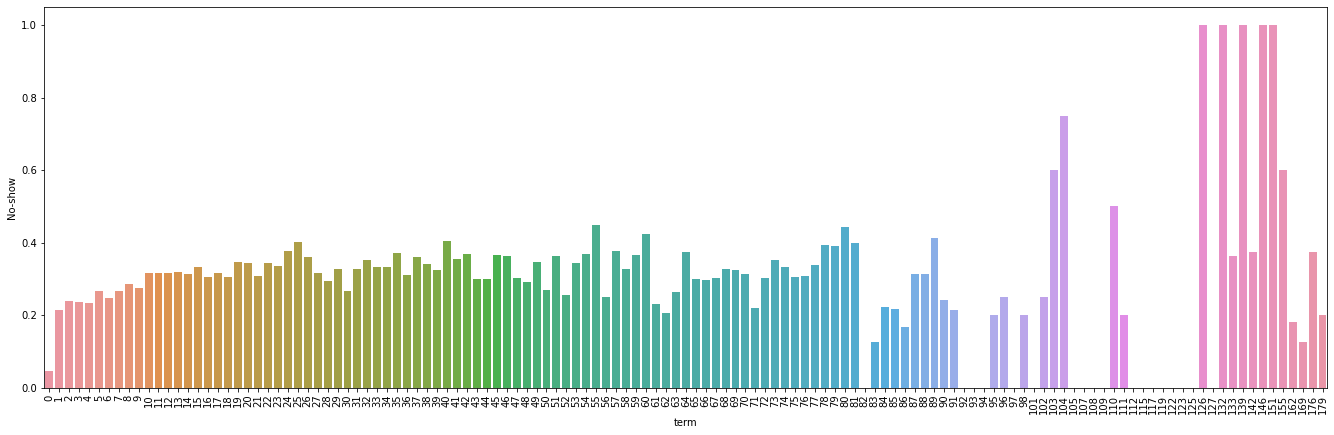

In [ ]:
# term에 따른 No-show 평균 시각화

df['term'] = df['term'].str.replace('days', '')
df['term'] = df['term'].astype(int)

term_mean = df[['term','No-show']].groupby('term').mean()
term_mean = term_mean.reset_index()

plt.figure(figsize=(23,7))
plt.xticks(rotation=90)
sns.barplot(x = 'term', y = 'No-show',  data = term_mean);

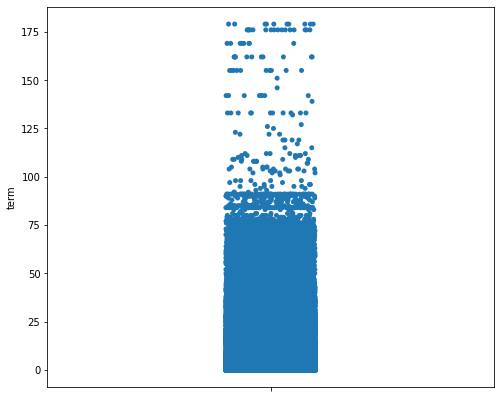

In [ ]:
# stripplot of 'term'

f,ax = plt.subplots(figsize = (8,7))
sns.stripplot(data = df, y = 'term');

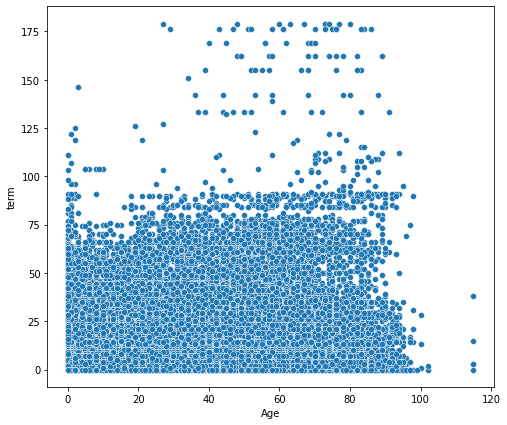

In [ ]:
# scatterplot of 'Age', 'term'

f,ax = plt.subplots(figsize = (8,7))
sns.scatterplot(x = 'Age', y = 'term', data = df );

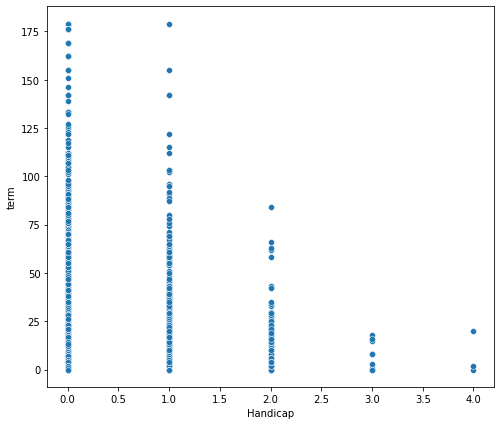

In [ ]:
# scatterplot of 'Handicap', 'term'

f,ax = plt.subplots(figsize = (8,7))
sns.scatterplot(x = 'Handicap', y = 'term', data = df );

In [ ]:
# correlation 확인

df[['No-show','term']].corr()

,No-show,term
No-show,1.00000,0.18632
term,0.18632,1.00000


###**(2)-2. 'Age_Band' feature 생성**
- 0세부터  115세까지 구간을 나눠서 age밴드를 지정했습니다.
- 연속적인 Age feature를 구간을 나눔으로 인해 또 다른 정보를 얻을 수 있다는 가설을 설정하여 생성했습니다.

            0   ~  19세 : Age_band = 1
            20  ~  34세 : Age_band = 2
            35  ~  49세 : Age_band = 3
            50  ~  64세 : Age_band = 4
            65  ~  79세 : Age_band = 5
            80  ~  94세 : Age_band = 6
            95 ~  109세 : Age_band = 7
            110세 이상   : Age_band = 8

In [ ]:
# Age band 함수 생성 및 적용

def get_age_label(age) :
  if age < 20 : return 1
  elif age < 35 : return 2
  elif age < 50 : return 3
  elif age < 65 : return 4
  elif age < 80 : return 5
  elif age < 95 : return 6
  elif age < 110 : return 7
  elif age < 124 : return 8
  else : return 0

df['Age_Band'] = df['Age'].apply(lambda x : get_age_label(x))

###**(2)-3. 'Physical_condition' feature 생성**
- 'Nagative_Physical_condition' = 'Hipertension' + 'Diabetes' + 'Alcoholism' + 'Handicap'
- 부정적인 신체 컨디션이 있을수록 진료일에 No-show하지 않을 것이다라는 가설을 세워 생성했습니다.

In [ ]:
df['Physical_condition'] = df['Hipertension'] + df['Diabetes'] + df['Alcoholism'] + df['Handicap']

###**(2)-4. 'positive' feature 생성**
- 'positive' = 'Scholarship' + 'SMS_received'
- 장학금을 받고 있을수록, 사전에 병원 예약 안내 문자를 받았을수록 진료일에 No-show하지 않을 것이다라는 가설을 세워 생성했습니다.

In [ ]:
df['positive'] = df['Scholarship'] + df['SMS_received']

###**(2)-5.  PolynomialFeatures 생성**

- sklearn의 PolynomialFeatures 방식에서 착안하여  polynomial and interaction features를 생성했습니다.

      1. 'Age^2'
      2. 'term^2'
      3. 'Neighbourhood^2'
      3. 'Age*term*Neighbourhood'
      4. 'Age*term'
      5. 'Age*Neighbourhood'
      6. 'term*Neighbourhood'

In [ ]:
# Neighborhood feature를 ordinal encoding
enc = OrdinalEncoder()
df = enc.fit_transform(df)

In [ ]:
# feature engineering

df['Age^2'] = df['Age'] * df['Age']
df['term^2'] = df['term'] * df['term']
df['Neighbourhood^2'] = df['Neighbourhood'] * df['Neighbourhood']
df['Age*term*Neighbourhood'] = df['Age'] * df['term'] * df['Neighbourhood']
df['Age*term'] = df['Age'] * df['term'] 
df['Age*Neighbourhood'] = df['Age'] * df['Neighbourhood']
df['term*Neighbourhood'] = df['term'] * df['Neighbourhood']

###**(2)-6 Age_mean feature 생성**

- 여러 카테고리('Gender', 'Scholarship',	'Hipertension',	'Diabetes',	'Alcoholism', 'Handicap')에 대한 나이의 평균을 구했습니다.
- 이후 merge를 이용하여 본 데이터에 새로 만든 feature를 추가했습니다.

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Sch_int,App_int,term,Age_Band,Physical_condition,positive,Age^2,term^2,Neighbourhood^2,Age*term*Neighbourhood,Age*term,Age*Neighbourhood,term*Neighbourhood
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,1,0,1,0,0,0,0,0,1461955088000000000,1461888000000000000,0,4,1,0,3844,0,1,0,0,62,0
1,5.589978e+14,5642503,1,2016-04-29,2016-04-29,56,1,0,0,0,0,0,0,0,1461946107000000000,1461888000000000000,0,4,0,0,3136,0,1,0,0,56,0
2,4.262962e+12,5642549,0,2016-04-29,2016-04-29,62,2,0,0,0,0,0,0,0,1461946744000000000,1461888000000000000,0,4,0,0,3844,0,4,0,0,124,0
3,8.679512e+11,5642828,0,2016-04-29,2016-04-29,8,3,0,0,0,0,0,0,0,1461950971000000000,1461888000000000000,0,1,0,0,64,0,9,0,0,24,0
4,8.841186e+12,5642494,0,2016-04-29,2016-04-29,56,1,0,1,1,0,0,0,0,1461946043000000000,1461888000000000000,0,4,2,0,3136,0,1,0,0,56,0


In [ ]:
# groupby할 categorical feature 선정

group_cols = ['Gender', 'Scholarship',	'Hipertension',	'Diabetes',	'Alcoholism', 'Handicap']

In [ ]:
# groupby로 여러 categorical feature의 category별 Age 평균을 출력

gp = df[group_cols + ['Age']].groupby(group_cols)['Age'].mean().reset_index().rename(columns = {'Age' : 'Age_mean'})
gp.head(15)

,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,Age_mean
0,0,0,0,0,0,0,33.107680
1,0,0,0,0,0,1,40.666023
2,0,0,0,0,0,2,29.977273
3,0,0,0,0,0,3,64.000000
4,0,0,0,0,0,4,9.000000
5,0,0,0,0,1,0,42.498925
6,0,0,0,0,1,1,31.500000
7,0,0,0,1,0,0,52.592497
8,0,0,0,1,0,1,56.222222
9,0,0,0,1,1,0,36.600000


In [ ]:
# merge를 이용해 새로만든 'Age_mean'을 본 데이터에 추가해 넣음

df = df.merge(gp, on = group_cols, how = 'left')

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Sch_int,App_int,term,Age_Band,Physical_condition,positive,Age^2,term^2,Neighbourhood^2,Age*term*Neighbourhood,Age*term,Age*Neighbourhood,term*Neighbourhood,Age_mean
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,1,0,1,0,0,0,0,0,1461955088000000000,1461888000000000000,0,4,1,0,3844,0,1,0,0,62,0,60.657844
1,5.589978e+14,5642503,1,2016-04-29,2016-04-29,56,1,0,0,0,0,0,0,0,1461946107000000000,1461888000000000000,0,4,0,0,3136,0,1,0,0,56,0,27.565000
2,4.262962e+12,5642549,0,2016-04-29,2016-04-29,62,2,0,0,0,0,0,0,0,1461946744000000000,1461888000000000000,0,4,0,0,3844,0,4,0,0,124,0,33.107680
3,8.679512e+11,5642828,0,2016-04-29,2016-04-29,8,3,0,0,0,0,0,0,0,1461950971000000000,1461888000000000000,0,1,0,0,64,0,9,0,0,24,0,33.107680
4,8.841186e+12,5642494,0,2016-04-29,2016-04-29,56,1,0,1,1,0,0,0,0,1461946043000000000,1461888000000000000,0,4,2,0,3136,0,1,0,0,56,0,64.109422


# **4. Training model**

- 
      기준모델 : 빈도수가 높은 target값(0)의 빈도를 기준모델로 정했습니다.
      기준모델의 accuracy = 0.79

                      accuracy   precision    recall    f1-score     AUC score
      randomforest      0.80        0.52       0.12       0.20         0.73
        Xgboost         0.77        0.39       0.34       0.36         0.72

- 
      Information leakage는 없습니다.

      위의 모델 예측 결과를 바탕으로 판단했을 때, 
      accurcy, precision, recall , auc score가 Information leakage로 판단될 만큼 높게 나오지 않았습니다,

In [ ]:
# 기준모델과설정 및 기준모델의 accuracy출력

# mode(): Return the highest frequency value in a Series.
major = df['No-show'].mode()[0]               # 기준모델
y_pred_b = [major] * len(df['No-show'])       # 기준모델로 예측

# 기준모델로 accuracy 계산
print("기준모델의 accuracy: ", accuracy_score(df['No-show'], y_pred_b))

기준모델의 accuracy:  0.7981017182254956


In [ ]:
# 데이터셋 분할 : 'train : val : test = 6 : 2 : 2' 로 분할했습니다.

from sklearn.model_selection import train_test_split

# training set, test set을 8:2로 분할했습니다.
train, test = train_test_split(df, test_size=0.20, random_state=7)

# training set, validation set을 8:2로 분할했습니다.
train, val = train_test_split(train, test_size=0.25, random_state=7) # 0.25 x 0.8 = 0.2


train.shape, val.shape, test.shape

((66312, 28), (22104, 28), (22105, 28))

In [ ]:
# 독립변수와 종속변수세트 분리

features = df.drop(columns=['ScheduledDay',	'AppointmentDay','No-show']).columns
target = 'No-show'

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

##**(1) Random Forest**

In [ ]:
# class weights 계산

import numpy as np

# n_samples / (n_classes * np.bincount(y))
custom = len(y_train)/(2*np.bincount(y_train))
custom

array([0.62663718, 2.47414372])

In [ ]:
# 파이프라인을 만들기

pipe = make_pipeline(
    OrdinalEncoder(), 
    RandomForestClassifier(n_estimators=100, random_state=2, class_weight={0:custom[0], 1:custom[1]}, n_jobs=-1)
)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

검증 정확도:  0.7973217517191459


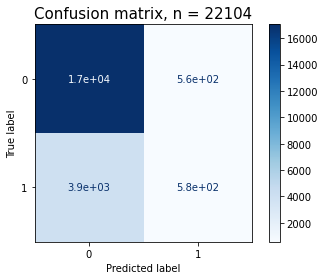

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
# val set에 대해서 recall, precision, f1-score, accuracy 값 출력


print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     17607
           1       0.51      0.13      0.21      4497

    accuracy                           0.80     22104
   macro avg       0.66      0.55      0.54     22104
weighted avg       0.75      0.80      0.75     22104



In [ ]:
# Noshow 할 확률 예측
y_pred_proba = pipe.predict_proba(X_val)[:, 1]

# AUC score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.7339790488295468

## **(2) XGBoost**

In [ ]:
# Imbalanced data set이기 때문에 weight를 조절하기 위한 ratio를 계산했습니다.

target_value_counts = y_train.value_counts().tolist()
ratio = float(target_value_counts[0]/target_value_counts[1])   # ratio : 개수가 많은 타켓카테고리 / 개수가 적은 타켓카테고리 

# Ordinal encoding

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

# Xgboost (Early Stopping 사용)

model = XGBClassifier(
    random_state = 2,
    n_estimators = 3000,  
    max_depth = 7,        
    learning_rate = 0.2,
    scale_pos_weight = ratio, # imbalance 데이터이기 떄문에 ratio를 적용하여 weight를 조절했습니다.
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds=100
         ) # 100 rounds 동안 스코어의 개선이 없으면 멈춤

[0]	validation_0-error:0.418733	validation_1-error:0.429967
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.413274	validation_1-error:0.426393
[2]	validation_0-error:0.41356	validation_1-error:0.427117
[3]	validation_0-error:0.404587	validation_1-error:0.418702
[4]	validation_0-error:0.401074	validation_1-error:0.415898
[5]	validation_0-error:0.40127	validation_1-error:0.416712
[6]	validation_0-error:0.397907	validation_1-error:0.415581
[7]	validation_0-error:0.396866	validation_1-error:0.415762
[8]	validation_0-error:0.396776	validation_1-error:0.415128
[9]	validation_0-error:0.395042	validation_1-error:0.414178
[10]	validation_0-error:0.393353	validation_1-error:0.413274
[11]	validation_0-error:0.390819	validation_1-error:0.412505
[12]	validation_0-error:0.388693	validation_1-error:0.411102
[13]	validation_0-error:0.386355	validation_1-error:0.410

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=3000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3.9482874412357285,
              seed=None, silent=None, subsample=1, verbosity=1)

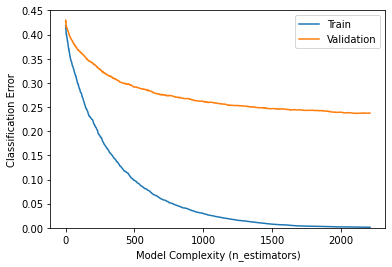

In [ ]:
# early stopping 시각화

results = model.evals_result()
train_error = results['validation_0']['error']
val_error = results['validation_1']['error']

epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0, 0.45)) # Zoom in
plt.legend();

In [ ]:
# val set에 대해서 recall, precision, f1-score, accuracy 값 출력

print(classification_report(y_val, model.predict(X_val_encoded)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     17607
           1       0.41      0.36      0.38      4497

    accuracy                           0.76     22104
   macro avg       0.62      0.61      0.62     22104
weighted avg       0.75      0.76      0.76     22104



In [ ]:
# Noshow 할 확률
y_pred_proba = model.predict_proba(X_val)[:, 1]


# AUC score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.7237941037131979

# **5. RandomSearchCV**

                      accuracy   precision    recall    f1-score     AUC score
        RandomForest    0.80       0.48        0.15       0.23         0.73
           XGBoost      0.75       0.37        0.36       0.37         0.73
        

##**(1) RandomForest**

In [ ]:
# Ordinal encoding

enc = OrdinalEncoder()
X_train[features] = enc.fit_transform(X_train[features])
X_test[features] = enc.transform(X_test[features])



# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분

params = { 'n_estimators' : [120, 300],
           'max_depth' : [5, 8, 15, 25, 30,  None],
           'min_samples_split' : [1,2,5,10,15,100],
           'min_samples_leaf' : [1,2,5,10],
           'max_features' : ['log', 'sqrt', None]
            }

clf_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=7, class_weight={0:custom[0], 1:custom[1]}, n_jobs=-1), 
    param_distributions=params, 
    n_iter=50, 
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

clf_rf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 44.2min finished


In [ ]:
print('최적 하이퍼파라미터 : ', clf_rf.best_params_)
print('Accuracy : ', clf_rf.best_score_)

최적 하이퍼파라미터 :  {'n_estimators': 120, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Accuracy :  0.7885903003981181


In [ ]:
# RandomSearchCV에서 찾은 best estimator 가져오기

best_est_rf = clf_rf.best_estimator_

In [ ]:
# val set에 대해서 recall, precision, f1-score, accuracy 값 출력

y_pred_rf = best_est_rf.predict(X_val)
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     17607
           1       0.45      0.21      0.28      4497

    accuracy                           0.79     22104
   macro avg       0.64      0.57      0.58     22104
weighted avg       0.75      0.79      0.75     22104



In [ ]:
# Noshow 할 확률
y_pred_proba_rf = best_est_rf.predict_proba(X_val)[:, 1]


# AUC score
auc_score = roc_auc_score(y_val, y_pred_proba_rf)
auc_score

0.7367806174184846

In [ ]:
# test set에 대해서 recall, precision, f1-score, accuracy 값 출력

y_pred_rf = best_est_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     17689
           1       0.44      0.20      0.28      4416

    accuracy                           0.79     22105
   macro avg       0.63      0.57      0.58     22105
weighted avg       0.75      0.79      0.76     22105



In [ ]:
# Noshow 할 확률
y_pred_proba_rf = best_est_rf.predict_proba(X_test)[:, 1]


# AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_rf)
auc_score

0.7365926321299325

##**(2) XGBoost**


In [ ]:
# Ordinal encoding

enc = OrdinalEncoder()
X_train[features] = enc.fit_transform(X_train[features])
X_test[features] = enc.transform(X_test[features])



# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
params = { 'ets' : [0.01, 0.015, 0.025, 0.05, 0.1],
           'gamma' : [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
           'max_depth' : [3,5,7,9,12,15,17,25],
           'min_child_weight' : [1,3,5,7],
           'subsample' : [0.6, 0.7, 0.8, 0.9, 1.0],
           'colsample_bytree' : [0.6, 0.7, 0.8, 0.9, 1.0],
           'lambda' : [0.01, 0.1, 1.0],
           'alpha' : [0, 0.1, 0.5, 1.0]
            }

clf = RandomizedSearchCV(
    XGBClassifier(random_state = 7, n_jobs = -1, scale_pos_weight = ratio), 
    param_distributions=params, 
    n_iter=50, 
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 30.9min finished


In [ ]:
print('최적 하이퍼파라미터 : ', clf.best_params_)
print('Accuracy : ', clf.best_score_)

최적 하이퍼파라미터 :  {'subsample': 0.7, 'min_child_weight': 1, 'max_depth': 25, 'lambda': 1.0, 'gamma': 0.1, 'ets': 0.01, 'colsample_bytree': 0.9, 'alpha': 0}
Accuracy :  0.7660453613222343


In [ ]:
# RandomSearchCV에서 찾은 best estimator 가져오기
best_est_XGB = clf.best_estimator_

In [ ]:
# val set에 대해서 recall, precision, f1-score, accuracy 값 출력

y_pred_XGB = best_est_XGB.predict(X_val)
print(classification_report(y_val, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     17607
           1       0.41      0.33      0.36      4497

    accuracy                           0.77     22104
   macro avg       0.62      0.60      0.61     22104
weighted avg       0.75      0.77      0.76     22104



In [ ]:
# Noshow 할 확률
y_pred_proba_XGB = best_est_XGB.predict_proba(X_val)[:, 1]


# AUC score
auc_score = roc_auc_score(y_val, y_pred_proba_XGB)
auc_score

0.7333586166548699

In [ ]:
# test set에 대해서 recall, precision, f1-score, accuracy 값 출력

y_pred_XGB = best_est_XGB.predict(X_test)
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     17689
           1       0.40      0.32      0.35      4416

    accuracy                           0.77     22105
   macro avg       0.62      0.60      0.61     22105
weighted avg       0.75      0.77      0.76     22105



In [ ]:
# Noshow 할 확률
y_pred_proba_XGB = best_est_XGB.predict_proba(X_test)[:, 1]


# AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_XGB)
auc_score

0.7339136011203229

#**6. Threshold 최적화**

- RandomSearchCV 기반

                      accuracy   precision    recall    f1-score     
        RandomForest    0.79       0.46        0.18       0.25         
           XGBoost      0.78       0.42        0.25       0.31

## **(1) RandomForest**

In [ ]:
# RandomSearchCV에서 찾은 best estimator 가져오기
best_est_rf = clf_rf.best_estimator_

In [ ]:
# threshold 최적화

y_train_pred_proba_rf = best_est_rf.predict_proba(X_train)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_train_pred_proba_rf)

optimal_idx_rf = np.argmax(tpr_rf - fpr_rf)
optimal_threshold_rf = thresholds_rf[optimal_idx_rf]

print('idx:', optimal_idx_rf, ', threshold:', optimal_threshold_rf)

idx: 567 , threshold: 0.44849292833288174


In [ ]:
# val set 예측

y_val_pred_proba_rf = best_est_rf.predict_proba(X_val)[:, 1]
y_pred_optimal_rf = y_val_pred_proba_rf >= optimal_threshold_rf
print(classification_report(y_val, y_pred_optimal_rf))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17607
           1       0.42      0.30      0.35      4497

    accuracy                           0.77     22104
   macro avg       0.63      0.60      0.61     22104
weighted avg       0.75      0.77      0.76     22104



In [ ]:
# test set 예측

y_test_pred_proba_rf = best_est_rf.predict_proba(X_test)[:, 1]
y_pred_optimal_rf = y_test_pred_proba_rf >= optimal_threshold_rf
print(classification_report(y_test, y_pred_optimal_rf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     17689
           1       0.41      0.29      0.34      4416

    accuracy                           0.77     22105
   macro avg       0.62      0.59      0.60     22105
weighted avg       0.75      0.77      0.76     22105



##**(2) XGBoost**

In [ ]:
# RandomSearchCV에서 찾은 best estimator 가져오기
best_est_XGB = clf.best_estimator_

In [ ]:
# threshold 최적화

y_train_pred_proba = best_est_XGB.predict_proba(X_train)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 474 , threshold: 0.65671086


In [ ]:
# val set 예측

y_val_pred_proba = best_est_XGB.predict_proba(X_val)[:, 1]
y_pred_optimal = y_val_pred_proba >= optimal_threshold
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     17607
           1       0.47      0.20      0.28      4497

    accuracy                           0.79     22104
   macro avg       0.65      0.57      0.58     22104
weighted avg       0.75      0.79      0.76     22104



In [ ]:
# test set 예측

y_test_pred_proba = best_est_XGB.predict_proba(X_test)[:, 1]
y_pred_optimal = y_test_pred_proba >= optimal_threshold
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     17689
           1       0.46      0.20      0.28      4416

    accuracy                           0.79     22105
   macro avg       0.64      0.57      0.58     22105
weighted avg       0.75      0.79      0.76     22105



#**[모델 학습결과 및 최종모델 선정]**

- 기준모델의 accuracy = 0.79

                                      accuracy   precision    recall    f1-score     AUC score
      randomforest                      0.80       0.50        0.12       0.20         0.73
      RandomForest(RandomSearchCV)      0.80       0.48        0.15       0.23         0.73
      RandomForest(Threshold 적용)       0.79       0.46        0.18       0.25         
       
      XGBoost                           0.76       0.40        0.35       0.37         0.72 
      XGBoost(RandomSearchCV)           0.75       0.37        0.36       0.37         0.73  
      XGBoost(Threshold 적용)            0.78       0.42        0.25       0.31
      
- 최종모델 : RandomSearchCV와 Threshold적용시에는 val뿐만 아니라 test set 또한 예측을 해보았습니다.

      f1-score가 가장 높은 아래 모델이 최종모델입니다.
      XGBoost(RandomSearchCV)

- 모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?

      베이스 라인과 비슷한 accuracy를 보였습니다. 
      즉, 모델성능이 좋지 못했습니다.
      
      이유는 다음과 같습니다.
      첫번째, sample이 다양하지 않았습니다.
      : 'AppointmentDay'의 값이 약 한달기간에만 한정되어있습니다.
        또한 'AppointmentDay' 의 시간값이 00시00분00초로 통일되어 있어 정보가 누락된 부분이 있었습니다.
        이렇게 누락되거나 제한된 기간의 sample상태가 No-show 여부를 결정하는데 어려움을 주었다고 생각합니다.
        조금더 넓은 기간의 'AppointmentDay'가 있다면 예측하는데 도움이 될 것이라 생각합니다.
      
      두번째, feature가 다양하지 않았습니다.
      : 예를들어 '진료과', 'n번째 방문'과 같은 추가 feature가 있었으면 예측에 도움이 더 되었을 것이라 생각합니다.
        만약 고혈압 환자가 정형외과(진료과)를 예약했다면 No-show의 확률이 올라간다던지, 
        이번이 5번째 방문인 환자라면 처음 방문하는 환자보다 No-show 확률이 내려간다던지 하는등 예측에 도움될만한 feature가 더 필요합니다.
     
- 모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?
      성능 개선을 위해 가장 노력한 부분은 Feature engineering 부분입니다. 
      feature의 수가 적은편이기 때문에 기존 feature를 engineering함으로써 정보를 최대한 얻으려고 했습니다. 
      이후 미세조정으로 성능을 올려보기 위해 CV, 하이퍼 파라미터 튜닝, Threshold조정등을 시도해 봤습니다.
      
      
- 최종 모델에 관해 설명하세요.
      Feature engineering 이후 baseline에 한참 못미쳤던 모델성능을 baseline에 근접하게 끌어올렸고, 
      precision , recall면에서 성능이 좋아지기 했으나 모델을 사용해도 될 정도의 성능은 나오지 않았습니다.
      
      이후 실행된 CV, 하이퍼 파라미터 튜닝, Threshold조정으로는 모델 성능이 변하지 않았습니다.
      개인적으로 추측하기에 현재 가지고 있는 data만으로는 모델 성능이 baseline 수준까지 밖에 도달할 수 없지 않나 싶습니다.
      
      결론적으로 최종모델은 예측에 사용하기 적합하지 않습니다.
      다만 추가적인 sample 및 feature가 더해진다면 충분히 예측 가능성있는 모델을 만들 수 있을 것이라 생각합니다. 



#**7. 머신러닝 모델 해석**
 
- 최종모델인 XGBoost(RandomSearchCV)를 기반으로 분석했습니다.

##**(1) SHAP 라이브러리**

- 분산이 큰 features : term, age, Neighbourhood

          term : 예약날짜와 내원날자 사이의 term이 길수록 No-show확률이 커지는데 기여하고 있습니다.
                 이는 term이 길어질수록 상태의 호전 또는 약속일자를 잊었다는 이유로 No-show확률이 증가할 수도 있다는 가설을 세워볼 수 있습니다. 

          Age  : 나이가 적을수록 No-show확률이 커지는데 기여하고 있습니다.
                 나이가 적을수록 건강에 대한 염려도가 상대적으로 낮기때문에 상식과 어느정도 부합하는 결과입니다.

          Neighbourhood : 지역에 따라 ordinal encoding이 된 상태이기 때문에 수치와 No-show간에는 상관관계가 크게 없을것이라 예상됩니다.
                          실제로 색깔의 분포가 상대적으로 고르게 퍼져있음을 알 수 있습니다.
- 분산이 작은 features : SMS_received, Scholarship, Gender
          SMS_received : SMS를 수신하지 않은 그룹이 오히려 No-show에 기여하고 있습니다.
                         이는 일반적인 상식과 대립되는 내용입니다.
           
          Gender       : 여성보다 남성이 No-show할 확률이 높다는 경향성을 보여줍니다.
                         여성과 남성의 건강에 대한 생물학적 인식 차이에서 온 것일 수도 있겠습니다.
                         ("난 남자야! 건강하다니까?!")
          
          Scholarship : Scholarship을 받는 그룹일수록  No-show 할 확률이 높습니다.
                        이는 얼핏 "Scholarship을 받으니까 의료비에 투자할 수 있는 여력이 보통 사람들보다 많을 수 있는데 왜 이렇지?"
                        라고 생각할 수 있습니다.
                        하지만, Scholarship 지급 대상은 자금사정이 좋지 못한 사람들일 수 있으며 
                        그렇기 떄문에 "Scholarship을 받는 사람들이기에 의료비를 충달할 자금이 없어 병원에 오지 못하는 구나" 
                        라고 역으로도 생각해볼 수 있습니다. 

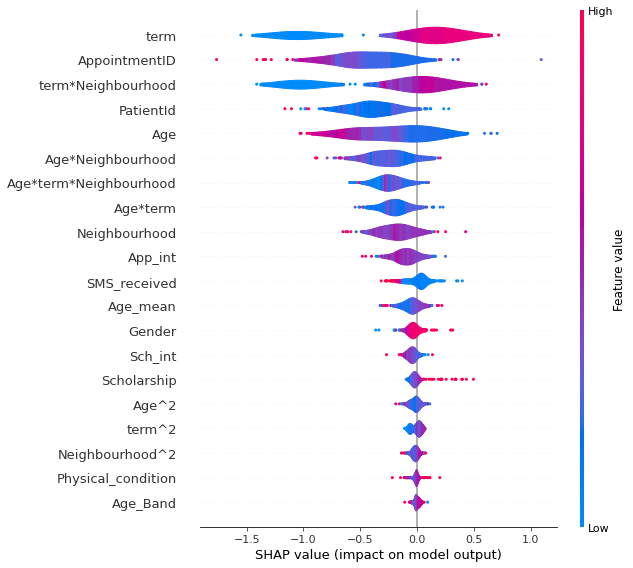

In [ ]:
# 최종 모델(best_est_XGB)을 기반으로 shap라이브러리의 summary violin plot 출력

explainer = shap.TreeExplainer(best_est_XGB)
shap_values = explainer.shap_values(X_test.iloc[:300])
shap.summary_plot(shap_values, X_test.iloc[:300], plot_type="violin")

###**개인별 맞춤 예측**

In [ ]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Sch_int,App_int,term,Age_Band,Physical_condition,positive,Age^2,term^2,Neighbourhood^2,Age*term*Neighbourhood,Age*term,Age*Neighbourhood,term*Neighbourhood,Age_mean
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,1,0,1,0,0,0,0,0,1461955088000000000,1461888000000000000,0,4,1,0,3844,0,1,0,0,62,0,60.657844


In [ ]:
row = X_test.iloc[[2]]
print('현재 sample의 실제값 : ', y_test.reset_index().loc[2,'No-show'])

import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

현재 sample의 실제값 :  0


**3. [shap.summary_plot : bar]**

- shap.summary_plot(bar)    **TOP 5**

        'term', 'AppointmentID', 'Age', 'PatientidID','Age*term*Neighbourhood'
- 

      feature engineering으로 생성한 feature다수가 상위권에 포함되었습니다.
      
      반면에, EDA에서 모델의 예측에 도움이 될 것이라 추측한 'Hipertension',	'Diabetes', 'Handicap' 이 없었던 것은 의외의 결과였습니다.
      'Diabetes', 'Handicap'은 카테고리별 imbalance 정도가 많이 심해 특정 카테고리의 sample수가 적었습니다. 
      따라서 이들이 순위권에 없는 이유는 충분히 설명이 됩니다. 
      하지만, 'Hipertension'의 경우 두 카테고리의 sample수가 상대적으로 적당했음에도 예측에 도움이 안되었네요.

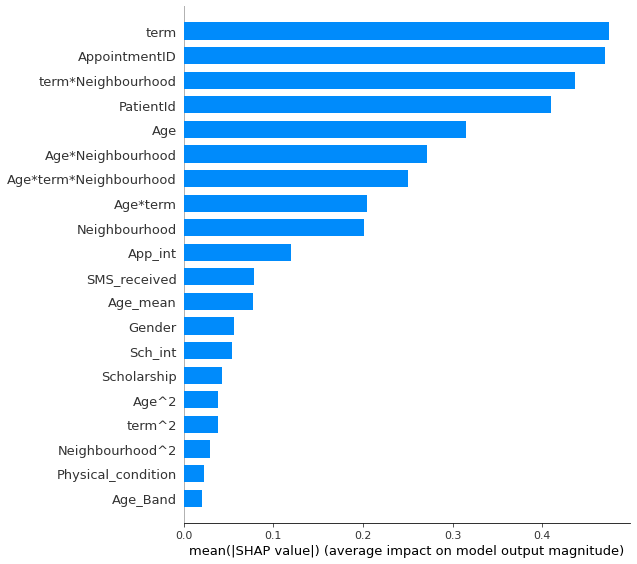

In [ ]:
# 최종 모델(best_est_XGB)을 기반으로 shap라이브러리의 summary bar plot 출력

shap.summary_plot(shap_values, X_test.iloc[:20000], plot_type="bar")

## **(2) Permutation importances**

**f1-score 기준**으로 Permutation importances를 계산했습니다.

- shap.summary_plot(bar)    **TOP 5**

      term                      0.115152
      Age                       0.079737
      AppointmentID             0.056036
      Age*term*Neighbourhood    0.052482
      term*Neighbourhood        0.044341
- 
      Top 5 중 feature engineering으로 생성한 feature 3개가 상위권에 포함되었습니다.
            
      반면에, Shap 라이브러리와 마찬가지로 EDA에서 모델의 예측에 도움이 될 것이라 추측한 
      'Hipertension', 'Diabetes', 'Handicap'이 하위권에 머물렀습니다.

      
      

In [ ]:
# XGBoost(RandomSearchCV)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    best_est_XGB, # model
    scoring='f1', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)


# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_test, y_test);

In [ ]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

positive                 -0.002512
Scholarship              -0.002096
SMS_received             -0.001308
Diabetes                 -0.001095
Age_Band                 -0.000740
Alcoholism                0.000078
Handicap                  0.000703
Hipertension              0.002065
Physical_condition        0.002145
Neighbourhood^2           0.002550
Sch_int                   0.002607
Age^2                     0.003219
Gender                    0.003435
Age_mean                  0.006318
term^2                    0.006816
PatientId                 0.018820
App_int                   0.023728
Neighbourhood             0.039052
Age*Neighbourhood         0.061905
Age*term                  0.066549
Age*term*Neighbourhood    0.079580
Age                       0.084909
AppointmentID             0.087276
term*Neighbourhood        0.129236
term                      0.129556
dtype: float64

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.1296 ± 0.0063,term
0.1292 ± 0.0047,term*Neighbourhood
0.0873 ± 0.0061,AppointmentID
0.0849 ± 0.0042,Age
0.0796 ± 0.0035,Age*term*Neighbourhood
0.0665 ± 0.0052,Age*term
0.0619 ± 0.0074,Age*Neighbourhood
0.0391 ± 0.0043,Neighbourhood
0.0237 ± 0.0069,App_int
0.0188 ± 0.0073,PatientId


##**(3) PDP라이브러리**


- SHAP와 permutation importance에서 중요도가 높다고 나온 'term'과 'Age'에 대한 PDP를 각각 만들어봤습니다.

- term : 환자가 '병원예약을 진행한 날짜'와 '진료예약일' 사이의 날짜 간격
        2월 18일에 병원에 전화해서 2월 20일에 진료를 받기로 예약 했다면,
        2월 18일은 환자가 '병원예약을 잔행한 날짜'이고,
        2월 20일은 환자가 실제로 진료를 받기로 한 '진료 예약일'입니다
        따라서 둘 사이의 날짜간격은 2day가 되겠습니다.

- category 

        진료 예약일에 No-show : 1
        진료 예약일에 show up : 0

- PDP 결과(**term**)

        term이 0에서 5일로 갈수록 병원 진료예약날짜에 No-show할 확률이 높습니다.
        하지만 term이 5일 이후가 되면 No-show할 확률이 변동이 없습니다.
        
- PDP 결과 해석(**term**)
        
        - term이 0인 경우      : No-show에 영향을 주지 않습니다. term이 0일때는 오히려 다른 feature에 의해 영향을 많이 받는다는 것을 알 수 있습니다.
        
        - term이 0초과 5일 이하 : 개인 경험상, 진료가 급하지 않은 사람이 '일단 예약해놓고 결정하자'라는 심리가 작용하여
                              No-show의 확률이 점점 올라가는 것이 아닌가 생각됩니다.
        
        - term이 5 이상       : term이 5일이상 벌어지면 term이 No-show에 주는 영향은 동일합니다. 

- PDP 결과(**Age**)

        0세부터 17세까지 나이가 들수록 No-show할 확률이 높습니다. 
        17세를 기점으로 나이가 들수록  No-show할 확률이 낮아집니다.
        
- PDP 결과 해석(**Age**)
        
        - Age 0 ~ 17세 : 일반적으로 건강에대한 염려가 없는 아주 건강한 나이대 입니다. 아이가 커가면서 자기의지가 커지는 만큼 
                          No-show에 대한 의지(병원 가기 싫다!)도 강해지는 것 같습니다.
        - Age 17세이상 : 나이가 들어감에 따라 슬슬 건강에 대한 염려가 커지기 시작합니다. 
                       따라서 자연스럽게 나이가 들수록 No-show에 대한 영향력은 작아지고 
                       Show-up쪽에 영향을 더 많이 주게 되는 상식적인 양상을 보이네요.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


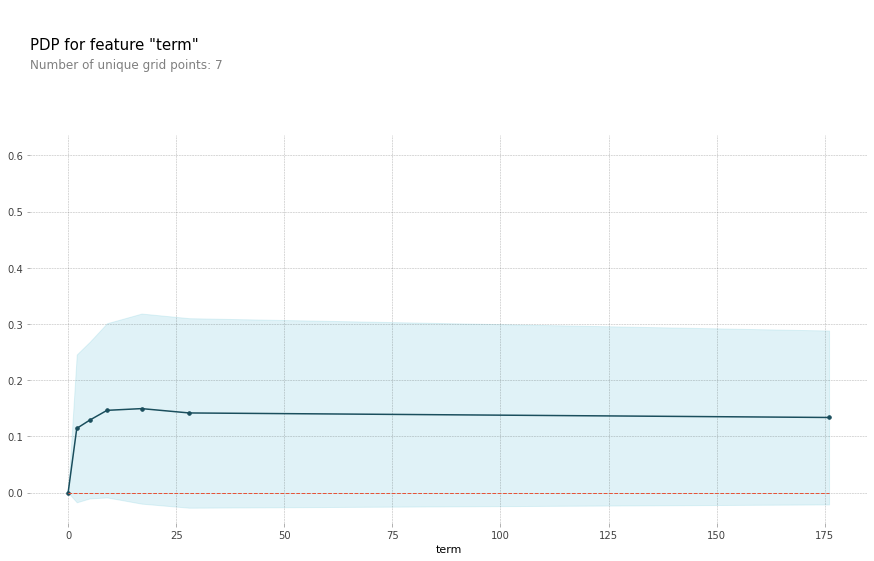

In [ ]:
# PDP of 'term'

feature = 'term'
pdp_dist = pdp.pdp_isolate(model=best_est_XGB, dataset=X_test, model_features=X_test.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature); 

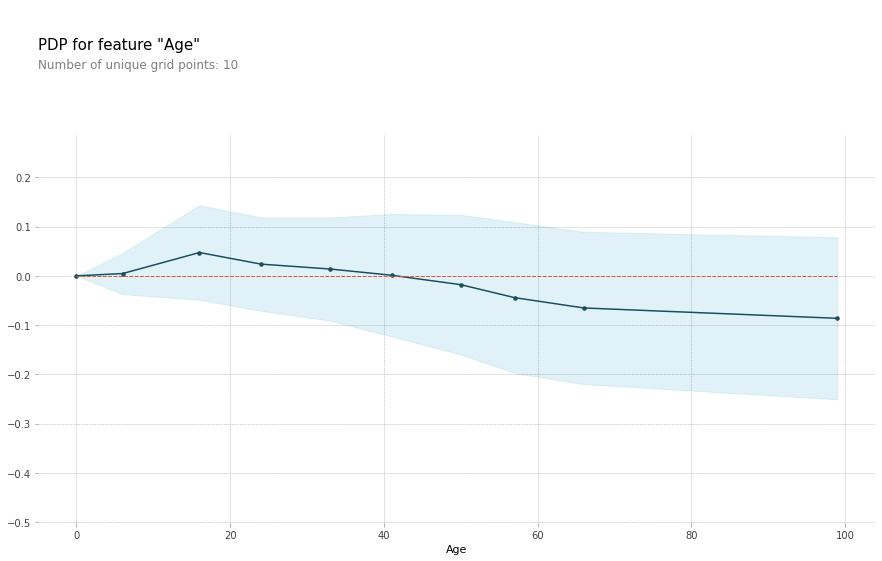

In [ ]:
# PDP of 'Age'

feature = 'Age'
pdp_dist = pdp.pdp_isolate(model=best_est_XGB, dataset=X_test, model_features=X_test.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature); 

- **feature importance가 중요한 Age, term 두 특성의 관계에 대한 PDP를 만들었습니다.**


- PDP 결과

        Age는 16세 ~ 24세
        term은 58일 ~ 122일
        위에 있는 분류군이 가장 No-show할 확률이 높습니다.
        
- PDP 결과 해석
        
        Age와 term 각각을 분석했을 떄와 일치하는 결과가 나왔습니다.
        10대 후반~ 20대초반 이면서 term이 5일이상일 경우 
        No-show확률이 높습니다.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


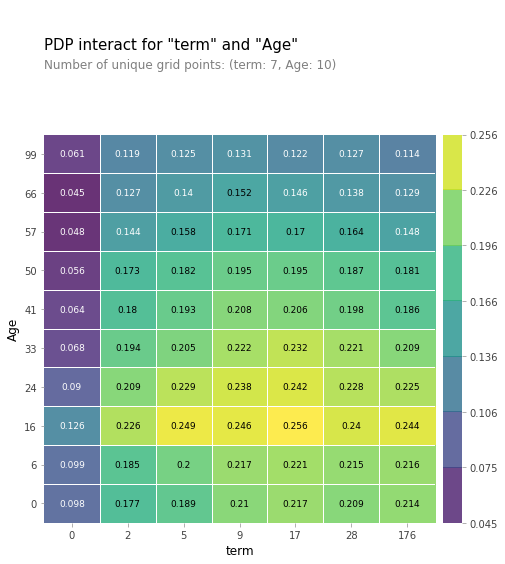

In [ ]:
features = ['term',	'Age']

interaction = pdp_interact(model=best_est_XGB, dataset=X_test, model_features=X_test.columns, features=features)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);